## Subjective Value (Risk & Ambiguity) Reformulated 3.1
Only thought through value in positive space.

Ambiguity is the proportion the lottery that is obscured. 
* A = 0.5 means 50% of lottery is hidden

Beta (ambiguity tolerance) could be imagined as how much of the ambiguous probability a person assumes to be "win":
* β = 1, you believe 100% of hidden lottery is win (ambiguity seeking)
* β = 0.5, you believe 50% of hidden lottery is win (ambiguity neutral)
* β = 0, you believe 0% of hidden lottery is win (ambiguity averse)

Alpha (risk tolerance) could be imagined as how much you believe the risk of losing applies to you:
* α = 1, you believe level of risk matters (risk neutral)
* α < 1, you believe risk level doesn't matter - because you're definitely gonna lose (risk averse)
* α > 1, you believe risk level doesn't matter - because you're definitely gonna win (risk seeking)

$$p : [0,1]$$
$$α : (0,∞)$$ but pure tolerance to risk is at $α=1$.
$$β : [0,1]$$
but pure tolerance to ambiguity is at $β=.5$.
$$A : [0,1]$$

$$ p_s(p | β, A)=   \left\{
\begin{array}{ll}
      p &: \space A=0 \\
      A(p + β) &: A > 0 \\
\end{array} 
\right.  $$


$$SV(v | α, p_s)=p_s v α^{(1-p_s)}$$

In [2]:
import numpy as np
import pylab as plt

In [3]:
def subjective_prob(p, amb, beta, blending=1):
    """
    Inputs:
    - v = objective value in money space
    - amb = proportion of obscured space
    - beta = ambiguity tolerance, range [0,1]
    - blending = position of ambiguous space
    
    Output:
    - subjective probability of lottery option
    """
    if amb == 0:
        return p
    return amb * (p + beta)

def sv(v, alpha, subjective_prob):
    """
    Inputs
    - v = objective value of lottery option
    - alpha = risk tolerance
    - subjective_prob
    
    Output
    - Money value for point of subjective equality for v given prob (p=1), alpha, beta, and ambiguity (A=0)
    """
    return subjective_prob * v * alpha**(1 - subjective_prob)

def sv_inv(sv, alpha, subjective_prob):
    """
    Inputs
    - v = objective value of lottery option
    - alpha = risk tolerance
    - subjective_prob
    
    Output
    - Money value for point of subjective equality for lottery value given prob, alpha, beta, and ambiguity
    """
    return sv/(subjective_prob * alpha**(1 - subjective_prob))

def sv_questplus(v, params):
    """
    Inputs
    - v = objective value of lottery option
    - params = input from QuestPlus
    
    Ouput
    - Alpha
    - Beta
    - Probability
    - Ambiguity
    """
    alpha, beta, probability, ambiguity = params
    return sv(v, alpha, subjective_prob(probability, ambiguity, beta))

In [4]:
amb = .5

print("Risk neutral, ambiguity neutral")
print("larger than 50% because there's still 50% that's definitely winnings")
print(sv(50, .5, subjective_prob(1, amb, .5)), subjective_prob(1, amb, 0.5))
print("")

print("Risk neutral, ambiguity averse")
print("50% because you feel sure the ambiguity is against you")
print(sv(50, .5, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))
print("")

print("Risk averse, ambiguity averse")
print("25% because you feel like the 50% is only a half likely win")
print(sv(50, .25, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))
print("")

print("Risk seeking, ambiguity averse")
print("100% because you feel like the an apparent 50% shot is all you need to win it big.")
print(sv(50, 1, subjective_prob(1, amb, 0)), subjective_prob(1, amb, 0))


Risk neutral, ambiguity neutral
larger than 50% because there's still 50% that's definitely winnings
31.533615572014295 0.75

Risk neutral, ambiguity averse
50% because you feel sure the ambiguity is against you
17.67766952966369 0.5

Risk averse, ambiguity averse
25% because you feel like the 50% is only a half likely win
12.5 0.5

Risk seeking, ambiguity averse
100% because you feel like the an apparent 50% shot is all you need to win it big.
25.0 0.5


In [5]:
beta = .5
print("Reasonable alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .7, .5))
print(sv(50, .3, .5))
print("Ambiguity")
print(sv(50, .5, subjective_prob(1, amb, beta)), subjective_prob(1, amb, beta))
print(sv(50, .5, subjective_prob(.5, amb, beta)))
print(sv(50, .7, subjective_prob(.5, amb, beta)))
print(sv(50, .3, subjective_prob(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .2, 1))
print(sv(50, .2, .5))
print(sv(50, .4, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .2, subjective_prob(1, amb, beta)))
print(sv(50, .2, subjective_prob(.5, amb, beta)))
print(sv(50, .4, subjective_prob(.5, amb, beta)))
print(sv(50, .1, subjective_prob(.5, amb, beta)))
print("High Alpha")
print(sv(50, .9, 1))
print(sv(50, .9, .5))
print(sv(50, 1, .5))
print(sv(50, 1, .5))
print("Ambiguity")
print(sv(50, .9, subjective_prob(1, amb, beta)))
print(sv(50, .9, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))

Reasonable alpha
50.0
17.67766952966369
20.91650066335189
13.693063937629152
Ambiguity
31.533615572014295 0.75
17.67766952966369
20.91650066335189
13.693063937629152
Low Alpha
50.0
11.180339887498949
15.811388300841896
7.905694150420948
Ambiguity
25.077761436615827
11.180339887498949
15.811388300841896
7.905694150420948
High Alpha
50.0
23.717082451262844
25.0
25.0
Ambiguity
36.52514049094863
23.717082451262844
25.0
25.0


In [6]:
amb = .5
print("Reasonable alpha")
print(sv(50, .5, 1))
print(sv(50, .5, .5))
print(sv(50, .7, .5))
print(sv(50, .3, .5))
print("Ambiguity")
print(sv(50, .5, subjective_prob(1, amb, beta)), subjective_prob(1, amb, beta))
print(sv(50, .5, subjective_prob(.5, amb, beta)))
print(sv(50, .7, subjective_prob(.5, amb, beta)))
print(sv(50, .3, subjective_prob(.5, amb, beta)))
print("Low Alpha")
print(sv(50, .2, 1))
print(sv(50, .2, .5))
print(sv(50, .4, .5))
print(sv(50, .1, .5))
print("Ambiguity")
print(sv(50, .2, subjective_prob(1, amb, beta)))
print(sv(50, .2, subjective_prob(.5, amb, beta)))
print(sv(50, .4, subjective_prob(.5, amb, beta)))
print(sv(50, .1, subjective_prob(.5, amb, beta)))
print("High Alpha")
print(sv(50, .9, 1))
print(sv(50, .9, .5))
print(sv(50, 1, .5))
print(sv(50, 1, .5))
print("Ambiguity")
print(sv(50, .9, subjective_prob(1, amb, beta)))
print(sv(50, .9, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))
print(sv(50, 1, subjective_prob(.5, amb, beta)))

Reasonable alpha
50.0
17.67766952966369
20.91650066335189
13.693063937629152
Ambiguity
31.533615572014295 0.75
17.67766952966369
20.91650066335189
13.693063937629152
Low Alpha
50.0
11.180339887498949
15.811388300841896
7.905694150420948
Ambiguity
25.077761436615827
11.180339887498949
15.811388300841896
7.905694150420948
High Alpha
50.0
23.717082451262844
25.0
25.0
Ambiguity
36.52514049094863
23.717082451262844
25.0
25.0


In [7]:
print(sv(50, 5, subjective_prob(.13, 0, .5)))

26.36436165140937


In [8]:
import numpy as np
arange = np.arange
ambiguity_space = [.24, .5, .74]
probability_space = [.13, .25, .38, .5, .75]
steps = 4

def round_fiddy(n):
    return np.round(n * 2, 0)/2
  
def make_sample_sv_ranges(alpha, beta, probability, ambiguity, steps, value_max=50):
    p_s = subjective_prob(probability, ambiguity, beta) #Ss subjective probability of winning lottery
    sv_se = sv(value_max, alpha, p_s)  
    ss = (sv_se - 0)/(2 * (steps + 1) - 1) #make room to exclude the sv_min (safe) from the range
    se_space = arange(0, sv_se + ss/2, ss) #steps in subjective equality space
    if len(list(se_space)) < 10:
        se_space = np.append(se_space, sv_se)
    safe = round_fiddy(se_space[1]) #round all values, slicing off first value (0)
    space = [sv_inv(se, alpha, p_s) for i, se in enumerate(se_space) if i > 1]
    space = [max(.5, round_fiddy(v)) for i, v in enumerate(space)]
    se_space = se_space[2:]
    sv_half = np.average(se_space)    
    return space, safe, se_space, sv_half

In [53]:
make_sample_sv_ranges(1.2, .5, .5, .0, 4)

([11.0, 16.5, 22.0, 28.0, 33.5, 39.0, 44.5, 50.0],
 3.0,
 array([ 6.08580619,  9.12870929, 12.17161239, 15.21451549, 18.25741858,
        21.30032168, 24.34322478, 27.38612788]),
 16.735967034880073)

In [54]:
alphas = arange(0.01, 3.01, .02)
alphas = np.round(alphas, 2)

svs = []
moneys = []
beta = .5
amb = 0
prob = .5

lot_svs_lines = []
lot_money_lines = []
se_lines = []
for i in range(8):
    lot_svs_lines.append([])
    lot_money_lines.append([])
    se_lines.append([])
safe_svs_line = []
safe_money_line = []
sv_half_money_line = []
space = None
for alpha in alphas:
    space, safe, se_space, sv_half = make_sample_sv_ranges(alpha, beta, prob, amb, 4)
    sv_half_money_line.append(sv_half)
    safe_money_line.append(safe)
    for i, lott in enumerate(space):
        lot_money_lines[i].append(lott)
        se_lines[i].append(se_space[i])

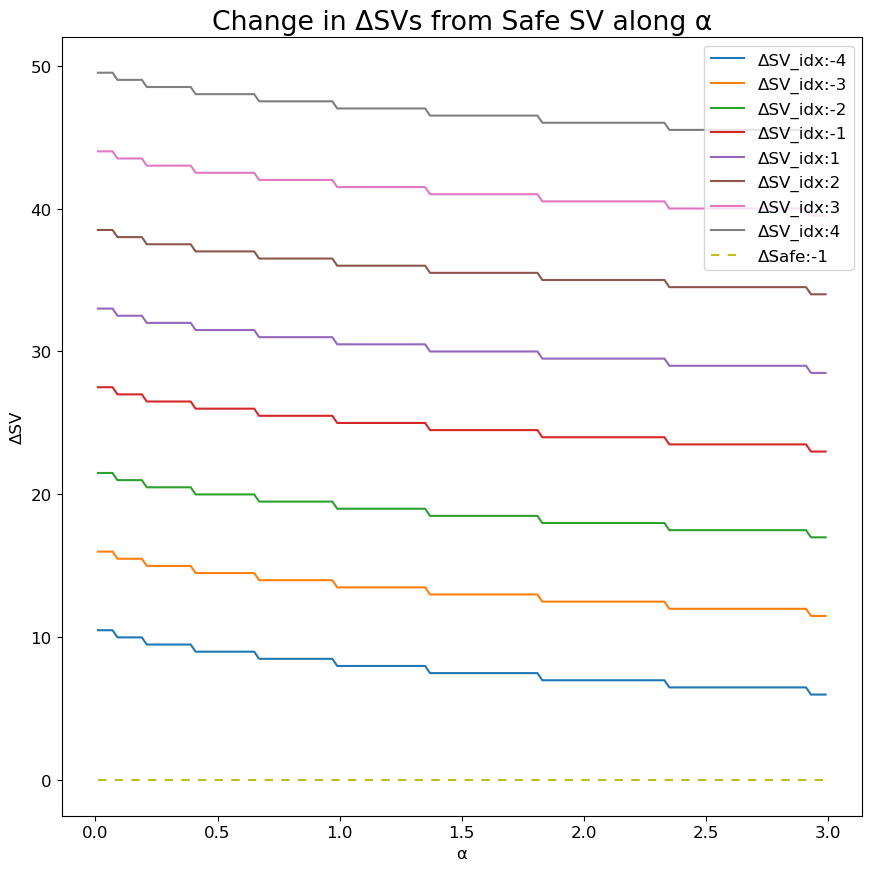

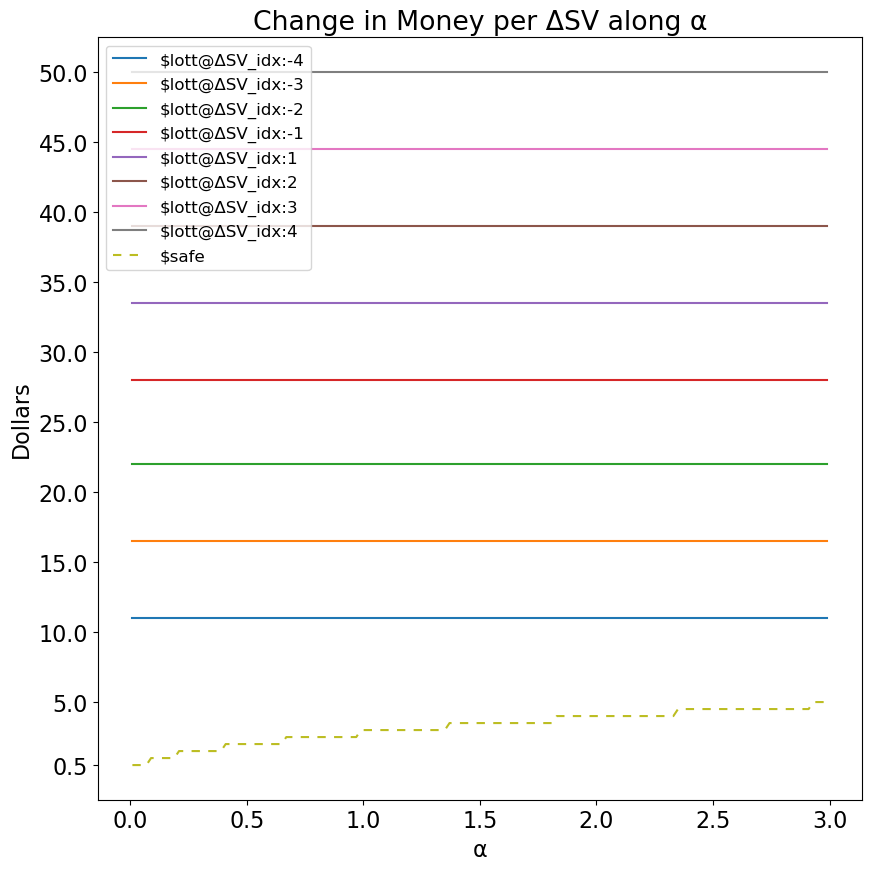

In [55]:
import pylab as plt
import numpy as np
# SVs
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i - 4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i] - np.array(safe_money_line), label = "ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line) - np.array(safe_money_line), dashes=[4,4], label = "ΔSafe:-1")
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Change in ΔSVs from Safe SV along α".format(beta, prob, amb))
plt.tight_layout()
plt.show()

# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i - 4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(lot_money_lines)[i], label = "$lott@ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes=[4,4], label = "$safe")
plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("Dollars")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Change in Money per ΔSV along α")
plt.tight_layout()
plt.show()

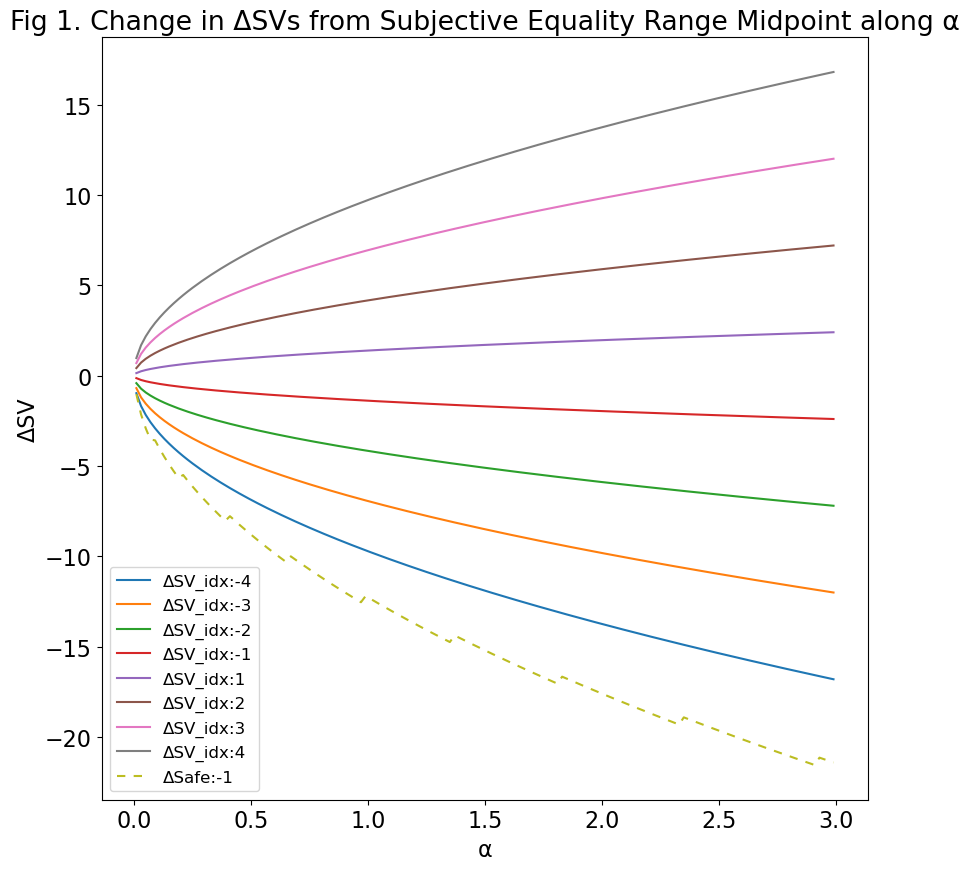

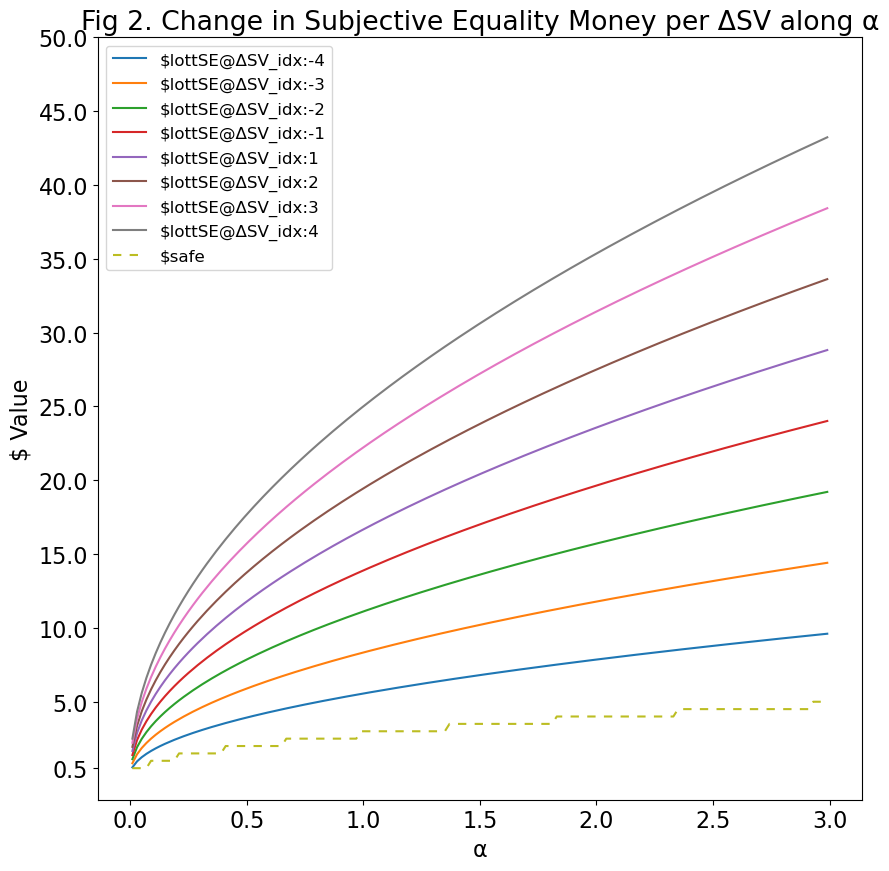

In [56]:
import pylab as plt
import numpy as np

# SVs
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i - 4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(se_lines)[i] - np.array(sv_half_money_line), label = "ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line) - np.array(sv_half_money_line), dashes = [4,4], label = "ΔSafe:-1")
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.xlabel("α")
plt.ylabel("ΔSV")
plt.rcParams.update({'font.size': 16})
plt.title("Fig 1. Change in ΔSVs from Subjective Equality Range Midpoint along α".format(beta, prob, amb))
plt.tight_layout()
plt.savefig("new_fig1.jpg", bbox_inches='tight')
plt.show()

# money
plt.figure(figsize=(9,9))
for i, s in enumerate(space):
    idx = i - 4
    if idx >= 0:
        idx += 1
    plt.plot(alphas, np.array(se_lines)[i], label = "$lottSE@ΔSV_idx:" + str(idx))
plt.plot(alphas, np.array(safe_money_line), dashes = [4,4], label = "$safe")
plt.rcParams.update({'font.size': 12})
plt.xlabel("α")
plt.ylabel("$ Value")
money = np.arange(0., 50.5, 5)
money[0] = .5
plt.yticks(money)
plt.legend(loc = 'upper left')
plt.rcParams.update({'font.size': 16})
plt.title("Fig 2. Change in Subjective Equality Money per ΔSV along α")
plt.tight_layout()
plt.savefig("new_fig2.jpg", bbox_inches='tight')
plt.show()

# Make schedule

In [57]:
alpha = 1
beta = .8
steps = 4
random = np.random

trials = {"crdm_lott_sv":[], "crdm_safe_sv":[], "crdm_lott":[], "crdm_sure_amt":[], 
          "crdm_lott_p":[], "crdm_amb_lev":[], "crdm_delta_sv":[], 
          "crdm_domain":[], "crdm_sv_half":[], "crdm_quad_idx":[]}
parseInt = int


def append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 
                 prob, amb, se_space, sv_half, domain, choice_idx):
    trials["crdm_lott_sv"].append(lott_sv)
    trials["crdm_safe_sv"].append(safe_sv)
    trials["crdm_lott"].append(lott)
    trials["crdm_sure_amt"].append(safe)
    trials["crdm_lott_p"].append(prob)
    trials["crdm_amb_lev"].append(amb)
    trials["crdm_delta_sv"].append(se_space[choice_idx]-sv_half)
    trials["crdm_sv_half"].append(sv_half)
    trials["crdm_domain"].append(domain)
    trials["crdm_quad_idx"].append(choice_idx)


def generate_trials(trials, alpha, beta, steps):
    # trials per unique probability and ambiguity
    trials_per = 9  
    choice_idxs = [0,1,2,3,3.5,4,5,6,7]
    delta_idx = arange(8)
    ambiguity_space = [.24, .5, .74]
    probability_space = [.13, .25, .38, .5, .75]
    for prob in probability_space: # probability trials, no ambiguity
        svs, sv_min, se_space, sv_half = make_sample_sv_ranges(alpha, beta, prob, 0, steps)        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx-parseInt(choice_idx)
                choice_idx = random.choice([inty,inty+1], p=[1-odds, odds])           
            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv            
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 
                         prob, 0, se_space, sv_half, 1, choice_idx)

    for amb in ambiguity_space: # ambiguity trials, prob at 0.5
        svs, sv_min, se_space, sv_half = make_sample_sv_ranges(alpha, beta, 0.5, amb, steps)        
        for tidx in range(trials_per):
            choice_idx = choice_idxs[tidx]
            if (choice_idx != parseInt(choice_idx)):
                inty = parseInt(choice_idx)
                odds = choice_idx-parseInt(choice_idx)
                choice_idx = random.choice([inty,inty+1], p=[1-odds, odds])
            subspace_sv = svs[choice_idx]
            lott_sv = subspace_sv
            safe_sv = sv_min
            lott = lott_sv
            safe = safe_sv
            append_trial(trials, alpha, beta, safe_sv, lott_sv, lott, safe, 
                         0.5, amb, se_space, sv_half, 1, choice_idx)
generate_trials(trials, alpha, beta, steps)

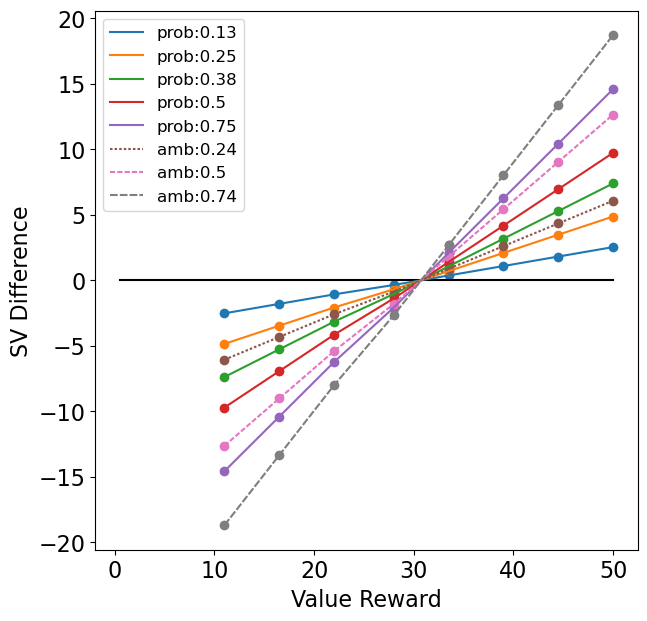

In [58]:
import pandas as pd
import pylab as plt

df = pd.DataFrame(trials)
gain = df.query("crdm_domain == 1")
plt.figure(figsize=(7,7))
plt.plot([0.5, 50], [0, 0], color = "black")
prob_trials = gain.query("crdm_amb_lev == 0")
prob = np.unique(prob_trials["crdm_lott_p"].values)

for p in prob:
    trial_set = prob_trials.query("crdm_lott_p == @p")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label = "prob:" + str(p))
    plt.scatter(money[idx], sva[idx])
amb_trials = gain.query("crdm_amb_lev != 0")
amb = np.unique(amb_trials["crdm_amb_lev"].values)

for a in amb:
    trial_set = amb_trials.query("crdm_amb_lev == @a")
    money = trial_set["crdm_lott"].values
    idx = np.argsort(money)
    sva = trial_set["crdm_delta_sv"].values
    plt.plot(money[idx], sva[idx], label = "amb:" + str(a), dashes = [5 * a, 1])
    plt.scatter(money[idx], sva[idx])
plt.xlabel("Value Reward")
plt.ylabel("SV Difference")
plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()

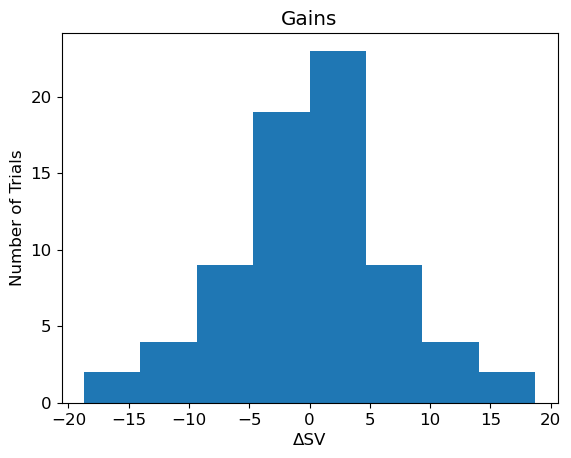

In [59]:
import pylab as plt
import pandas as pd
df = pd.DataFrame(trials)

bins = 8
gain = df.query("crdm_domain == 1")["crdm_delta_sv"].values
plt.hist(gain, bins = bins)
plt.xlabel("ΔSV")
plt.ylabel("Number of Trials")
plt.title("Gains")
plt.show()